# More details of the Ground States

In this notebook, we will delve into more details of the ground states (GS) we have already extracted with DMRG.

 - Energy evolution over different parameters
 - Entanglement Entropy (EE) spectrum
 - Correlation Length & Correlation Function
 - Overlap

In [40]:
from kitaev_ladder_snake1 import run_atomic, load_data

import numpy as np

import matplotlib.pyplot as plt

In [42]:
# The folder prefix
prefix = 'Spin1_full_map_high_precision/'

In [11]:
S=1

In [13]:
Jx=1
Jy=1
Jz=1
chi=128
result = run_atomic(S=S, Jx=Jx, Jy=Jy, Jz=Jz, chi=chi)

Reading 'L'=4 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=1 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for con

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


In [14]:
psi = result['psi']

In [23]:
print(psi.entanglement_spectrum()[0])

[ 1.36733583  1.67408679  2.58719079  2.83831626  2.96379841  3.07760562
  3.27831555  3.72267324  3.79079746  3.95613715  4.17069889  4.19811223
  4.24374025  4.30142571  4.37506755  4.54871913  4.63706361  4.66827052
  4.71329005  4.72860653  4.75147205  4.91413573  4.98788435  5.09809174
  5.10639078  5.15534786  5.19664978  5.2333202   5.2938902   5.40455588
  5.44563462  5.49594659  5.64204482  5.76174754  5.96941929  6.05726699
  6.08906348  6.10464794  6.11147525  6.15558319  6.29467975  6.41650088
  6.47530203  6.72152361  6.80963327  6.8414559   6.99780946  7.10531359
  7.26920117  7.45850365  7.55665858  7.85080008  7.87135021  8.15042675
  8.22622803  8.4013342   8.48269491  8.53916346  8.84211205  9.08568138
  9.26203543  9.88416498 10.35387786]


In [25]:
psi.entanglement_entropy()

array([2.79399219, 2.92948215, 3.0010579 , 2.93867773, 2.97712195,
       2.93943244, 2.28513767, 2.51356658])

In [27]:
psi.correlation_function('Sz', 'Sz')

array([[ 1.80250218e-03, -3.56144663e-05, -5.43335513e-17,
         4.10657174e-18,  4.67641116e-28, -3.55041893e-28,
        -2.38858767e-29, -4.38377466e-29],
       [-3.56144663e-05,  4.46876637e-02, -1.82710215e-15,
         8.69237629e-16, -2.77725877e-25,  1.67709696e-25,
         2.70673892e-27,  3.04719278e-26],
       [-5.43335513e-17, -1.82710215e-15,  6.38891373e-02,
        -3.06623282e-03, -2.35052188e-25, -2.35624124e-25,
        -6.24439983e-26,  3.80599348e-26],
       [ 4.10657174e-18,  8.69237629e-16, -3.06623282e-03,
         7.79972093e-02, -2.08999116e-23, -9.86944510e-24,
        -1.28448880e-24,  1.39919726e-24],
       [ 4.67641116e-28, -2.77725877e-25, -2.35052188e-25,
        -2.08999116e-23,  1.99140577e-01, -5.52277209e-02,
        -9.39708071e-14,  2.24135619e-13],
       [-3.55041893e-28,  1.67709696e-25, -2.35624124e-25,
        -9.86944510e-24, -5.52277209e-02,  4.91961391e-01,
        -3.21633224e-14, -2.04940345e-13],
       [-2.38858767e-29,  2.706738

In [31]:
J_list = [(J, J, 1.0) for J in np.linspace(2.0, 0.0, 21)]

psi_list = []

initial_psi = None
for J in J_list:
    Jx, Jy, Jz = J
    result = run_atomic(S=S, chi=chi, Jx=Jx, Jy=Jy, Jz=Jz, initial_psi=initial_psi)
    psi_list.append(result['psi'])
    
    initial_psi = result['psi'].copy()

Reading 'L'=4 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=1 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=2.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=2.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config TwoSiteDMRGEngine
Initial sweeps...
Reading 'start_env'=10 for config TwoSiteDMRGEngine
Updating environment
..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True f

..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 408
Energy = -1.1025133230195934, S = nan, norm_err = 4.6e-10
Current memory usage 420.5 MB, time elapsed: 89.6 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 7.8125e-11, max_E_trunc = 4.5651e-10
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 20, age = 648
Energy = -1.1025133236295233, S = nan, norm_err = 3.6e-10
Current memory usage 420.5 MB, time elapsed: 131.5 s
Delta E = -6.0993e-11, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.2794e-11, max_E_trunc = 3.4595e-10
MPS bond dimensions: [128, 128, 128, 128

Updating environment
.....
sweep 20, age = 648
Energy = -0.9849205952505784, S = nan, norm_err = 3.4e-09
Current memory usage 431.2 MB, time elapsed: 136.2 s
Delta E = -1.6649e-10, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 3.8424e-10, max_E_trunc = 1.7145e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 888
Energy = -0.9849205955951419, S = 1.1555803985415993, norm_err = 8.2e-12
Current memory usage 431.2 MB, time elapsed: 162.4 s
Delta E = -3.4456e-11, Delta S = nan (per sweep)
max_trunc_err = 1.7161e-10, max_E_trunc = 1.4988e-09
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 40, age = 1128
Energy = -0.9849205955859475, S = 1.1555804310490949, norm_err = 1.0e-11
Current memory usage 431.2 MB, time elapsed: 186.7 s
Delta E = 9.1944e-13, Delta S = 3.2507e-09 (per sweep)
max_trunc_err = 1.7755e-10, 

Updating environment
.....
sweep 40, age = 1128
Energy = -0.8701982205864169, S = 1.5956181988807394, norm_err = 3.9e-05
Current memory usage 452.0 MB, time elapsed: 184.8 s
Delta E = -2.2777e-10, Delta S = 3.9556e-04 (per sweep)
max_trunc_err = 7.0764e-08, max_E_trunc = 4.6038e-07
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 50, age = 1368
Energy = -0.8701982205805905, S = 1.5965126460697241, norm_err = 6.7e-06
Current memory usage 452.0 MB, time elapsed: 208.1 s
Delta E = 5.8265e-13, Delta S = 8.9445e-05 (per sweep)
max_trunc_err = 7.0938e-08, max_E_trunc = 4.6378e-07
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
DMRG finished after 50 sweeps.
total size = 1368, maximum chi = 128
Before the canonicalization:
Bond dim =  [128, 128, 128, 128, 128, 128, 128, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999996+1.8524568204804186e-16j)
After the canonicalization:
Bond dim =  [128, 128, 128, 128, 12

DMRG finished after 40 sweeps.
total size = 1128, maximum chi = 128
Before the canonicalization:
Bond dim =  [128, 128, 128, 128, 128, 128, 128, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-1.287570277611381e-16j)
After the canonicalization:
Bond dim =  [128, 128, 128, 128, 128, 128, 128, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=1 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=1.1 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=1.1 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
C

..........
Reading 'N_sweeps_check'=10 for config TwoSiteDMRGEngine
Reading 'max_sweeps'=200 for config TwoSiteDMRGEngine
Reading 'max_E_err'=1e-06 for config TwoSiteDMRGEngine
Reading 'max_S_err'=0.0001 for config TwoSiteDMRGEngine
Reading 'mixer'=True for config TwoSiteDMRGEngine
Subconfig 'mixer_params'=Config(<4 options>, 'mixer_params') for config TwoSiteDMRGEngine
Updating environment
.....
sweep 10, age = 408
Energy = -0.6318844352564490, S = nan, norm_err = 6.5e-11
Current memory usage 486.3 MB, time elapsed: 70.2 s
Delta E = nan, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 6.0284e-12, max_E_trunc = 1.9412e-11
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 20, age = 648
Energy = -0.6318844352597672, S = nan, norm_err = 8.4e-11
Current memory usage 486.3 MB, time elapsed: 107.5 s
Delta E = -3.3182e-13, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 5.0770e-12, max_E_trunc = 1.5689e-11
MPS bond dimensions: [128, 128, 128, 128

Updating environment
.....
sweep 20, age = 648
Energy = -0.5711811953107748, S = nan, norm_err = 6.3e-12
Current memory usage 486.3 MB, time elapsed: 85.9 s
Delta E = -1.3145e-14, Delta S = 0.0000e+00 (per sweep)
max_trunc_err = 2.9849e-13, max_E_trunc = 1.5348e-12
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Convergence criterium reached with enabled mixer.
disable mixer and continue
Updating environment
.....
sweep 30, age = 888
Energy = -0.5711811953111976, S = 0.7523585033950870, norm_err = 7.5e-12
Current memory usage 486.3 MB, time elapsed: 112.1 s
Delta E = -4.2277e-14, Delta S = nan (per sweep)
max_trunc_err = 1.1834e-13, max_E_trunc = 2.9559e-12
MPS bond dimensions: [128, 128, 128, 128, 128, 128, 128, 128]
Updating environment
.....
sweep 40, age = 1128
Energy = -0.5711811953112189, S = 0.7523585034312360, norm_err = 1.9e-12
Current memory usage 486.3 MB, time elapsed: 136.3 s
Delta E = -2.1316e-15, Delta S = 3.6149e-12 (per sweep)
max_trunc_err = 1.2059e-13, 

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [120, 128, 120, 128, 121, 128, 120, 128]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000029+4.191067728668742e-16j)
After the canonicalization:
Bond dim =  [120, 128, 120, 128, 121, 128, 120, 128]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=1 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.5999999999999999 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.5999999999999999 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [81, 114, 82, 114, 80, 114, 81, 114]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000084-5.00459191880285e-16j)
After the canonicalization:
Bond dim =  [81, 114, 82, 114, 80, 114, 81, 114]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=1 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.5 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [56, 82, 56, 81, 56, 81, 56, 81]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000011-3.8002978979289287e-16j)
After the canonicalization:
Bond dim =  [56, 82, 56, 81, 56, 81, 56, 81]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=1 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.3999999999999999 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.3999999999999999 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 option

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [39, 56, 39, 56, 38, 56, 39, 56]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000001-4.760809614871377e-16j)
After the canonicalization:
Bond dim =  [39, 56, 39, 56, 38, 56, 39, 56]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=1 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.2999999999999998 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.2999999999999998 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2119: UserWarning: canonical_form_infinite: project to smaller bond dimension
  self.canonical_form_infinite(renormalize)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [29, 38, 30, 38, 30, 38, 30, 38]
Canonicalizing...
The norm is:  1.0
The overlap is:  (0.9999999999999998-1.4897729296360922e-16j)
After the canonicalization:
Bond dim =  [29, 38, 30, 38, 30, 38, 30, 38]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=1 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.19999999999999996 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.19999999999999996 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 opt

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [21, 30, 21, 30, 21, 29, 21, 30]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.0000000000000064+4.1696823815309644e-17j)
After the canonicalization:
Bond dim =  [21, 30, 21, 30, 21, 29, 21, 30]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=1 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.09999999999999987 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.09999999999999987 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 opt

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2275: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(i1, Gl, Wr)
/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:2296: UserWarning: canonical_form_infinite: project to smaller bond dimension
  Gl, Wr = self._canonical_form_correct_left(j1, Gl, Wr_list[j1 % L])


Before the canonicalization:
Bond dim =  [13, 20, 13, 20, 13, 20, 13, 20]
Canonicalizing...
The norm is:  1.0
The overlap is:  (1.000000000000002+4.461630894227285e-16j)
After the canonicalization:
Bond dim =  [13, 20, 13, 20, 13, 20, 13, 20]
Computing properties
Optimizing
Loop for chi=128 done.
============================== END ==============================
Reading 'L'=4 for config KitaevLadderSnakeCompactModel
Reading 'conserve'=None for config KitaevLadderSnakeCompactModel
Reading 'S'=1 for config KitaevLadderSnakeCompactModel
Reading 'bc'='periodic' for config KitaevLadderSnakeCompactModel
Reading 'bc_MPS'='infinite' for config KitaevLadderSnakeCompactModel
Reading 'Jx'=0.0 for config KitaevLadderSnakeCompactModel
Reading 'Jy'=0.0 for config KitaevLadderSnakeCompactModel
Reading 'Jz'=1.0 for config KitaevLadderSnakeCompactModel


==============================START==============================
Chi =  128 

Subconfig 'trunc_params'=Config(<3 options>, 'trunc_params') for config 

In [33]:
energy_list = []
entropy_list = []
correlation_list = []
overlap_list = []


for psi in psi_list:
    entropy = np.mean(psi.entanglement_entropy())
    correlation = psi.correlation_length()
    entropy_list.append(entropy)
    correlation_list.append(correlation)



/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3702: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)


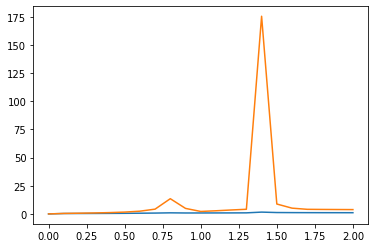

In [39]:
plt.plot([J[0] for J in J_list], entropy_list)
plt.plot([J[0] for J in J_list], correlation_list)

In [44]:
J_list_high_prec = [(J, J, 1.0) for J in np.linspace(2.0, 0.0, 201)]

psi_high_list = []
for J in J_list_high_prec:
    Jx, Jy, Jz = J
    result = load_data(Jx=Jx, Jy=Jy, Jz=Jz, L=2, chi=64, prefix=prefix)
    psi_high_list.append(result['psi'])
    
#     initial_psi = result['psi'].copy()

In [45]:
energy_high_list = []
entropy_high_list = []
correlation_high_list = []
overlap_high_list = []


for psi in psi_high_list:
    entropy = np.mean(psi.entanglement_entropy())
    correlation = psi.correlation_length()
    entropy_high_list.append(entropy)
    correlation_high_list.append(correlation)

/home/jerry/anaconda3/lib/python3.7/site-packages/tenpy/networks/mps.py:3702: UserWarning: trimming speigs k to smaller matrix dimension d
  eta, A = speigs(flat_linop, k=k, which='LM', **kwargs)


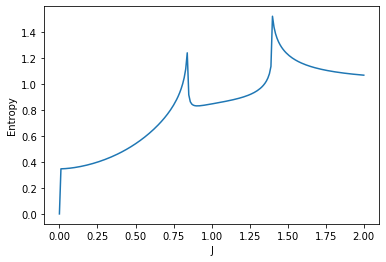

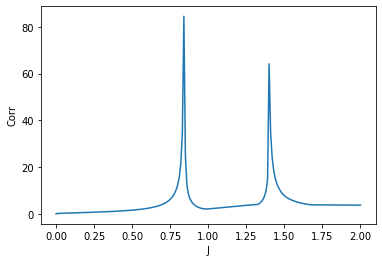

In [46]:
plt.plot([J[0] for J in J_list_high_prec], entropy_high_list)
plt.xlabel('J')
plt.ylabel('Entropy')
plt.show()
plt.plot([J[0] for J in J_list_high_prec], correlation_high_list)
plt.xlabel('J')
plt.ylabel('Corr')
plt.show()

In [47]:
for x in np.linspace(2.0, 0.0, 201):
    print(x)

2.0
1.99
1.98
1.97
1.96
1.95
1.94
1.93
1.92
1.91
1.9
1.89
1.88
1.87
1.8599999999999999
1.85
1.84
1.83
1.82
1.81
1.8
1.79
1.78
1.77
1.76
1.75
1.74
1.73
1.72
1.71
1.7
1.69
1.68
1.67
1.66
1.65
1.6400000000000001
1.63
1.62
1.6099999999999999
1.6
1.5899999999999999
1.58
1.57
1.56
1.55
1.54
1.53
1.52
1.51
1.5
1.49
1.48
1.47
1.46
1.45
1.44
1.43
1.42
1.4100000000000001
1.4
1.3900000000000001
1.38
1.37
1.3599999999999999
1.35
1.3399999999999999
1.33
1.3199999999999998
1.31
1.2999999999999998
1.29
1.28
1.27
1.26
1.25
1.24
1.23
1.22
1.21
1.2
1.19
1.18
1.17
1.1600000000000001
1.15
1.1400000000000001
1.13
1.12
1.1099999999999999
1.1
1.0899999999999999
1.08
1.0699999999999998
1.06
1.0499999999999998
1.04
1.03
1.02
1.01
1.0
0.99
0.98
0.97
0.96
0.95
0.94
0.9299999999999999
0.9199999999999999
0.9099999999999999
0.8999999999999999
0.8899999999999999
0.8799999999999999
0.8699999999999999
0.8599999999999999
0.8499999999999999
0.8400000000000001
0.8300000000000001
0.8200000000000001
0.81
0.8
0.79
0.78
0.77

In [ ]:
ini = 2.0
step = -.01

overlap_high_list = []
for N in range(200):
    overlap_high_list.append(psi_high_list[N].overlap(psi_high_list[N+1]))
#     ini += step

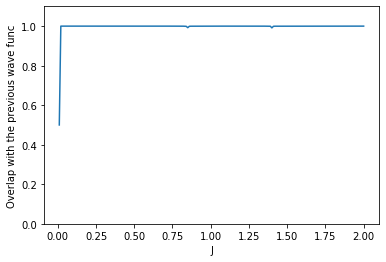

In [58]:
plt.plot([i for i in np.arange(2., 0, -.01)], np.abs(overlap_high_list))
plt.ylim([0, 1.1])
plt.xlabel("J")
plt.ylabel("Overlap with the previous wave func")
plt.show()